<h1 style='text-align:center; font-weight:bold; color:orange'>Long Short-Term Memory Model</h1>

Reference: [XAI for sentiment](https://github.com/doscsy12/XAI_sentiment_proj/blob/main/XAI_sentiment_analysis.ipynb)

### KETERANGAN
Matrik evaluasi yang digunakan dalam model deep learning ini adalah F1 dikarenakan tidak membobotkan salah satu lebih berat dari pada yang lainnya.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/sentimen/cleaned_data.csv', parse_dates=True)
df.head()

,Category,ProductName,Location,Price,OverallRating,NumberSold,TotalReview,CustomerRating,CustomerReview,Sentiment,Emotion,PriceBinned,tokens,CleanReview,ReviewLength
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy,Medium,"['alhamdulillah', 'berfungsi', 'packaging', 'a...",alhamdulillah berfungsi dengan baik packaging ...,14
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy,Medium,"['barang', 'bagus', 'respon', 'cepat', 'harga'...",barang bagus dan respon cepat harga bersaing d...,10
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy,High,"['barang', 'bagus', 'berfungsi', 'seler', 'ram...",barang bagus berfungsi dengan baik seler ramah...,9
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy,Medium,"['bagus', 'sesuai', 'harapan', 'penjual', 'ram...",bagus sesuai harapan penjual nya juga ramah tr...,9
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy,Medium,"['barang', 'bagus', 'pengemasan', 'aman', 'ber...",barang bagus pengemasan aman dapat berfungsi d...,8


In [ ]:
# Convert sentiment to binary
df['SentimentEnc'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Prepare data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['CleanReview'].apply(lambda x: ' '.join(x)))  # Join tokens for fitting
sequences = tokenizer.texts_to_sequences(df['CleanReview'].apply(lambda x: ' '.join(x)))
MAX_SEQUENCE_LENGTH = 30  # Adjust this based on your analysis of token lengths
sequences_padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, df['SentimentEnc'], test_size=0.2, random_state=42)

# Create LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=300, input_length=MAX_SEQUENCE_LENGTH))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# # Create Bidirectional LSTM model
# def create_bidirectional_lstm_model():
#     model = Sequential()
#     model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=300, input_length=MAX_SEQUENCE_LENGTH))
#     model.add(Bidirectional(LSTM(64, return_sequences=False)))
#     model.add(Dropout(0.5))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# Train and evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='binary', zero_division=0)
    recall = recall_score(y_test, predictions, average='binary', zero_division=0)
    f1 = f1_score(y_test, predictions, average='binary', zero_division=0)

    print(f'- Accuracy: {accuracy:.4f}')
    print(f'- Precision: {precision:.4f}')
    print(f'- Recall: {recall:.4f}')
    print(f'- F1 Score: {f1:.4f}')
    print("\nClassification Report:\n", classification_report(y_test, predictions))

In [ ]:
# Create and train the LSTM model
lstm_model = create_lstm_model()
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the LSTM model
print("LSTM Model Evaluation:")
evaluate_model(lstm_model, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


LSTM Model Evaluation:
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
- Accuracy: 0.7581
- Precision: 0.7570
- Recall: 0.7292
- F1 Score: 0.7429

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77       562
           1       0.76      0.73      0.74       517

    accuracy                           0.76      1079
   macro avg       0.76      0.76      0.76      1079
weighted avg       0.76      0.76      0.76      1079



### Keterangan
Pada eksperiment Pertama yaitu dengan menggunakan model LSTM dengan data yang telah dilakukan TFIDF dan menghasilkan score F1 sebesar 0.74.
Untuk mengurangi efek overfitting dengan menggunakan Dropot sebesar 0.2 yang artinya "menghilangkan" (drop) sejumlah unit dalam layer secara acak selama proses pelatihan. Dengan Dropout(0.2), sekitar 20% neuron dalam layer LSTM akan di-nonaktifkan selama training, yang mengurangi ketergantungan pada neuron tertentu dan mendorong jaringan untuk belajar representasi yang lebih umum.

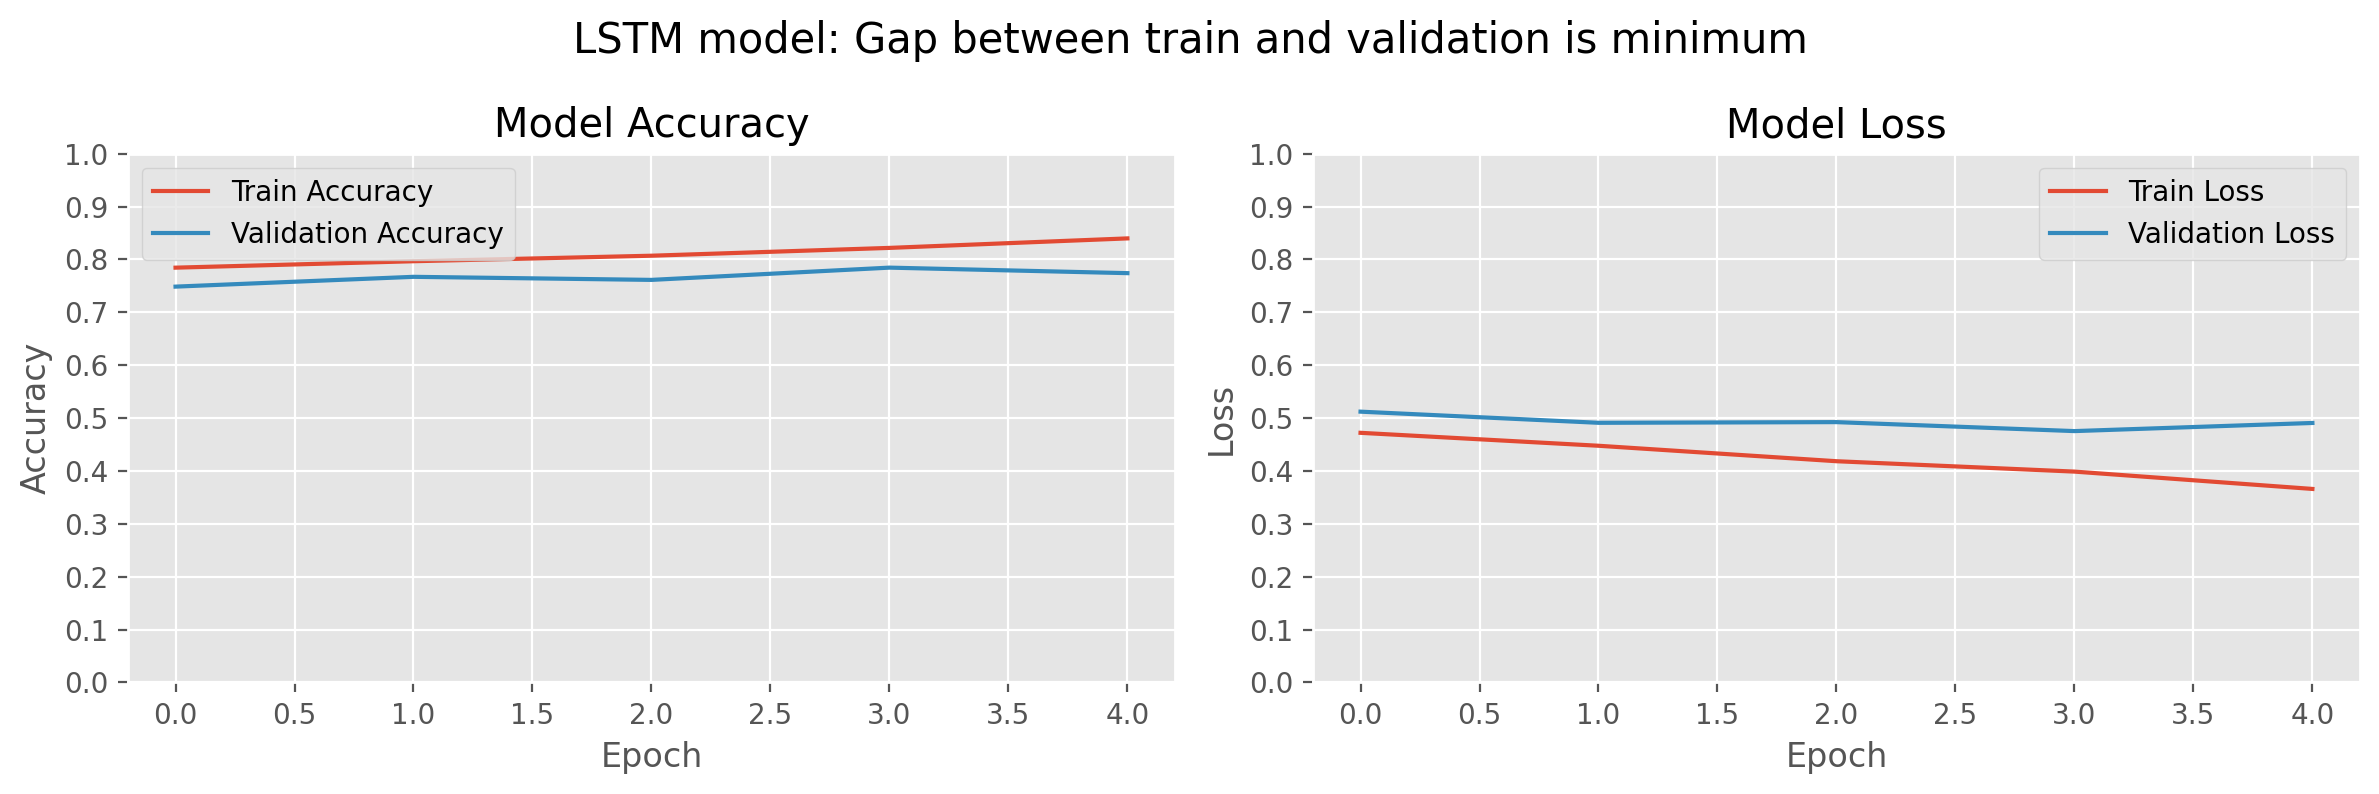

In [ ]:
lstm_history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 4), dpi=200)

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('LSTM model: Gap between train and validation is minimum', size=15)
plt.tight_layout()
plt.show()

Dari Grafik diatas dapat disimpulkan bahwa:
*   Model Accuracy (Grafik sebelah kiri):
  Grafik ini menunjukkan akurasi model selama pelatihan (Train Accuracy) dan validasi (Validation Accuracy) pada tiap epoch (siklus pelatihan).Akurasi pelatihan dan validasi relatif stabil dan mendekati satu sama lain, dengan Train Accuracy sedikit lebih tinggi dari Validation Accuracy. Ini menunjukkan bahwa model tidak mengalami overfitting, karena perbedaan antara akurasi pelatihan dan validasi sangat kecil.
*   Model Loss (Grafik sebelah kanan):
  Grafik ini menunjukkan nilai kerugian (loss) dari model selama pelatihan (Train Loss) dan validasi (Validation Loss) pada tiap epoch. Train Loss terus menurun, sementara Validation Loss tetap stabil dengan sedikit variasi. Perbedaan kecil antara Train Loss dan Validation Loss menunjukkan bahwa model mampu melakukan generalisasi dengan baik pada data validasi tanpa overfitting.







In [ ]:
# Convert sentiment to binary
df['SentimentEnc'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Prepare data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['CleanReview'].apply(lambda x: ' '.join(x)))  # Join tokens for fitting
sequences = tokenizer.texts_to_sequences(df['CleanReview'].apply(lambda x: ' '.join(x)))
MAX_SEQUENCE_LENGTH = 30  # Adjust this based on your analysis of token lengths
sequences_padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, df['SentimentEnc'], test_size=0.2, random_state=42)

# Create Bidirectional LSTM model
def create_bidirectional_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=300, input_length=MAX_SEQUENCE_LENGTH))
    model.add(Bidirectional(LSTM(150, return_sequences=False)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# create and train the Bidirectional LSTM model
bidirectional_lstm_model = create_bidirectional_lstm_model()
bidirectional_lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the Bidirectional LSTM model
print("\nBidirectional LSTM Model Evaluation:")
evaluate_model(bidirectional_lstm_model, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Bidirectional LSTM Model Evaluation:
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
- Accuracy: 0.7451
- Precision: 0.6984
- Recall: 0.8240
- F1 Score: 0.7560

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.67      0.73       562
           1       0.70      0.82      0.76       517

    accuracy                           0.75      1079
   macro avg       0.75      0.75      0.74      1079
weighted avg       0.75      0.75      0.74      1079



### Keterangan
Pada eksperiment Pertama yaitu dengan menggunakan model bidirectional LSTM dengan data yang telah dilakukan TFIDF dan menghasilkan score F1 sebesar 0.75.
Untuk mengurangi efek overfitting dengan menggunakan Dropot sebesar 0.2 yang artinya "menghilangkan" (drop) sejumlah unit dalam layer secara acak selama proses pelatihan. Dengan Dropout(0.2), sekitar 20% neuron dalam layer LSTM akan di-nonaktifkan selama training, yang mengurangi ketergantungan pada neuron tertentu dan mendorong jaringan untuk belajar representasi yang lebih umum.

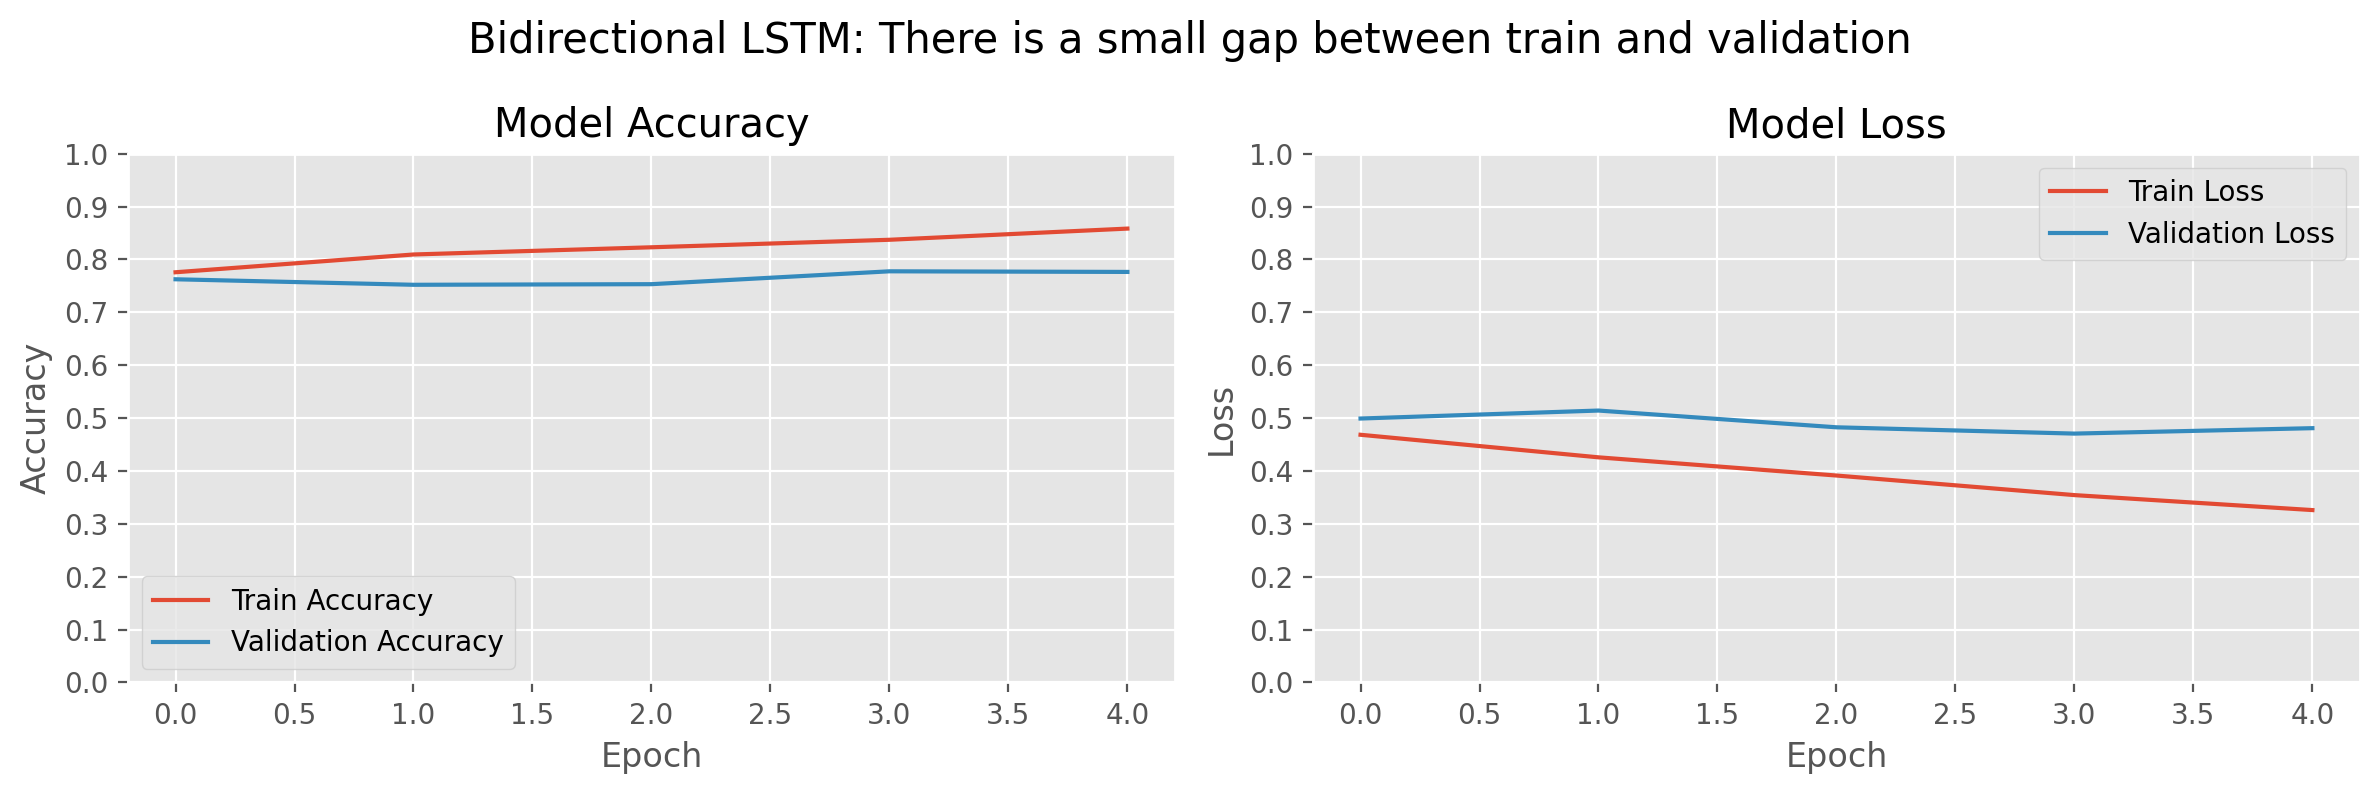

In [ ]:
bidlstm_history = bidirectional_lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 4), dpi=200)

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(bidlstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(bidlstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(bidlstm_history.history['loss'], label='Train Loss')
plt.plot(bidlstm_history.history['val_loss'], label='Validation Loss')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.suptitle('Bidirectional LSTM: There is a small gap between train and validation', size=15)
plt.tight_layout()
plt.show()

Dari Grafik diatas dapat disimpulkan bahwa:
*   Model Accuracy (Grafik sebelah kiri):
  Grafik ini menunjukkan akurasi model selama pelatihan (Train Accuracy) dan validasi (Validation Accuracy) pada tiap epoch (siklus pelatihan).Akurasi pelatihan dan validasi relatif stabil dan mendekati satu sama lain, dengan Train Accuracy sedikit lebih tinggi dari Validation Accuracy. Ini menunjukkan bahwa model tidak mengalami overfitting, karena perbedaan antara akurasi pelatihan dan validasi sangat kecil.
*   Model Loss (Grafik sebelah kanan):
  Grafik ini menunjukkan nilai kerugian (loss) dari model selama pelatihan (Train Loss) dan validasi (Validation Loss) pada tiap epoch. Train Loss terus menurun, sementara Validation Loss tetap stabil dengan sedikit variasi. Perbedaan kecil antara Train Loss dan Validation Loss menunjukkan bahwa model mampu melakukan generalisasi dengan baik pada data validasi tanpa overfitting.